In [5]:
import pandas as pd
import os
import requests
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# 1. Gathering data

In [6]:
df = pd.read_csv("twitter-archive-enhanced.csv")

- My request was rejected by Twitter 

In [7]:
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
# (response)

with open(os.path.join("image-predictions.tsv"), mode='wb') as file:
    file.write(response.content)
    
images = pd.read_csv('image-predictions.tsv', sep='\t')

In [8]:
df_json= pd.read_json("tweet-json.txt", lines=True)

# 2. Assessment process

In [9]:
df.sample(6)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
524,809220051211603969,NaN,NaN,2016-12-15 02:14:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kyro. He's a Stratocumulus Flop. Tongu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/809220051...,12,10,Kyro,None,None,None,None
1074,739844404073074688,NaN,NaN,2016-06-06 15:40:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Simba. He's the grand prize. The troph...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/739844404...,12,10,Simba,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,783214.0,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
786,774757898236878852,NaN,NaN,2016-09-10 23:54:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Finley. She's a Beneboop Cumbersplash....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/774757898...,12,10,Finley,None,None,None,None
464,817415592588222464,NaN,NaN,2017-01-06 17:00:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Strudel. He's rather h*ckin pupset that y...,NaN,NaN,NaN,https://www.gofundme.com/help-strudel-walk-aga...,11,10,Strudel,None,None,None,None
1503,692017291282812928,NaN,NaN,2016-01-26 16:12:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kingsley Wellensworth III. He owns 7 r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/692017291...,9,10,Kingsley,None,None,None,None


In [10]:
df_json.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [11]:
images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [14]:
images.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [16]:
df_json.describe()

,contributors,coordinates,favorite_count,geo,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str,retweet_count
count,0.0,0.0,2354.000000,0.0,2.354000e+03,2.354000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,2211.0,2211.0,2.900000e+01,2.900000e+01,2354.000000
mean,NaN,NaN,8080.968564,NaN,7.426978e+17,7.426978e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,0.0,0.0,8.162686e+17,8.162686e+17,3164.797366
std,NaN,NaN,11814.771334,NaN,6.852812e+16,6.852812e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,0.0,0.0,6.164161e+16,6.164161e+16,5284.770364
min,NaN,NaN,0.000000,NaN,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,0.0,0.0,6.721083e+17,6.721083e+17,0.000000
25%,NaN,NaN,1415.000000,NaN,6.783975e+17,6.783975e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,0.0,0.0,7.888183e+17,7.888183e+17,624.500000
50%,NaN,NaN,3603.500000,NaN,7.194596e+17,7.194596e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.340867e+17,8.340867e+17,1473.500000
75%,NaN,NaN,10122.250000,NaN,7.993058e+17,7.993058e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.664587e+17,8.664587e+17,3652.000000
max,NaN,NaN,132810.000000,NaN,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,0.0,0.0,8.860534e+17,8.860534e+17,79515.000000


In [17]:
images.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [18]:
df.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2])

In [19]:
df.name.unique() 

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja',
       'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose',
       'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra',
       'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn',
       'Boomer', 'Cody', 'Rumble', 'Clifford', 'quite', 'Dewey', 'Scout',
       'Gizmo', 'Cooper', 'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy',
       'Meatball', 'Paisley', 'Albus', 'Neptune', '

In [20]:
df_json.contributors.unique()

array([ nan])

In [21]:
df_json.coordinates.unique()

array([ nan])

In [22]:
df_json.possibly_sensitive.unique()

array([  0.,  nan])

In [23]:
df_json.possibly_sensitive_appealable.unique() 

array([  0.,  nan])

In [24]:
df_json.retweeted.unique()

array([False], dtype=bool)

In [25]:
df_json.truncated.unique()

array([False], dtype=bool)

### tidnees issues
#### `df` table 
* dog stages should be in one column 
* emerge the 3 tables in one
* Dataset contains retweets


#### `df_json` table
1. (contributors, coordinates, possibly_sensitive, possibly_sensitive_appealable,retweeted, truncated )coulmns are not variables since their values are constant for all rowes

### quality issues

#### `df` table 
*  "None"should be NaN in (name, doggo, floofer, pupper, puppo)coulmns.
*  tweet_id should be str instead of int
* timestamp should be time stamp instead of object.
* there are in name coulmn  incorrect names such as: an, a, my, all, his, such, not, very, actually, this, the,just,by , mad, old, space, 0,life, one 
* coulmns names is not clear so it should be renamed with more explanatory  name. timestamp>>tweet_time, text>>tweet_text, name>>dog_name 
* drop (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)since it won't be udsed  .
* drop (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)since it won't be udsed
#### `images` table

* tweet_id should be str instead of int
 

 


# 3. cleaning processe

In [26]:
df_clean=df.copy()
df_json_clean=df_json.copy()
images_clean=images.copy()

### define
- replace every None in df into NaN.

### code

In [27]:
df_clean=df_clean.replace('None','')


### test

In [28]:
df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,,,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,,,
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,,,
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,,,
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,,,


### define
- Create a new variable `dog_stage` in df_clean merge the four columns into it, drop the four columns

### code

In [29]:
df_clean['stage'] = df_clean.doggo.str.cat(df_clean.floofer).str.cat(df_clean.pupper).str.cat(df_clean.puppo)


In [30]:
df_clean = df_clean.drop(['doggo','floofer','pupper','puppo'], axis = 1)


In [31]:
df_clean['stage'] = df_clean['stage'].replace('', np.nan)

### test

In [32]:
df_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage
233,847842811428974592,NaN,NaN,2017-03-31 16:07:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Rontu. He is described as a pal, cuddl...",NaN,NaN,NaN,"https://www.gofundme.com/help-save-rontu,https...",12,10,Rontu,NaN
1398,699775878809702401,NaN,NaN,2016-02-17 02:02:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Fillup. Spaghetti is his main weakness. A...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699775878...,11,10,Fillup,NaN
1551,689143371370250240,NaN,NaN,2016-01-18 17:52:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Trip. He likes wearing costumes that aren...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689143371...,10,10,Trip,pupper
1266,709852847387627521,NaN,NaN,2016-03-15 21:24:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",*lets out a tiny whimper and then collapses* ....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/709852847...,12,10,,NaN
98,873213775632977920,NaN,NaN,2017-06-09 16:22:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sierra. She's one precious pupper. Abs...,NaN,NaN,NaN,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,pupper


In [33]:
df_clean.shape

(2356, 14)

### define
remove all rows that have values  non_null in `retweeted_status_id`, `retweeted_status_user_id`, and `retweeted_status_timestamp` columns. 

In [34]:
df_clean=df_clean[df_clean.retweeted_status_id.isnull()]
df_clean=df_clean[df_clean.retweeted_status_user_id.isnull()]
df_clean=df_clean[df_clean.retweeted_status_timestamp.isnull()]


### test

In [35]:
sum(df_clean.retweeted_status_id.notnull()),
sum(df_clean.retweeted_status_user_id.notnull()),
sum(df_clean.retweeted_status_timestamp.notnull())


0

### define 
- drop (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)

### code

In [36]:
df_clean = df_clean.drop(['in_reply_to_status_id','in_reply_to_user_id', 
'retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1)

### test

In [37]:
list(df_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'stage']

### define
- - drop `contributors`, `coordinates`, `possibly_sensitive`, `possibly_sensitive_appealable`,`retweeted`, and `truncated` coulmns in df_json_clean

### code

In [38]:
df_json_clean = df_json_clean.drop(columns=['contributors','coordinates','possibly_sensitive','possibly_sensitive_appealable','retweeted','truncated'])

### test

In [39]:
list(df_json_clean)

['created_at',
 'display_text_range',
 'entities',
 'extended_entities',
 'favorite_count',
 'favorited',
 'full_text',
 'geo',
 'id',
 'id_str',
 'in_reply_to_screen_name',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'is_quote_status',
 'lang',
 'place',
 'quoted_status',
 'quoted_status_id',
 'quoted_status_id_str',
 'retweet_count',
 'retweeted_status',
 'source',
 'user']

### define

df_clean table

rename 
- imestamp>>tweet_time 
- text>>tweet_text 
- name>>dog_name 

df_json_clean table

rename 
- "full_text">> "tweet_text" 

### code

In [40]:
df_clean.rename(columns={"timestamp": "tweet_time", "text": "tweet_text", "name":"dog_name"},inplace =True)
df_json_clean.rename(columns={"full_text": "tweet_text"},inplace =True)


###  test

In [41]:
list(df_clean),list(df_json_clean)

(['tweet_id',
  'tweet_time',
  'source',
  'tweet_text',
  'expanded_urls',
  'rating_numerator',
  'rating_denominator',
  'dog_name',
  'stage'],
 ['created_at',
  'display_text_range',
  'entities',
  'extended_entities',
  'favorite_count',
  'favorited',
  'tweet_text',
  'geo',
  'id',
  'id_str',
  'in_reply_to_screen_name',
  'in_reply_to_status_id',
  'in_reply_to_status_id_str',
  'in_reply_to_user_id',
  'in_reply_to_user_id_str',
  'is_quote_status',
  'lang',
  'place',
  'quoted_status',
  'quoted_status_id',
  'quoted_status_id_str',
  'retweet_count',
  'retweeted_status',
  'source',
  'user'])

### define
1. change `tweet_id` column in images_clean  to str instead of int
2. change the type of `tweet_time` column to time stamp instead of object
3. change `tweet_id` column to str instead of int


### code

In [42]:
df_clean.tweet_time = pd.to_datetime(df_clean.tweet_time)
df_clean.tweet_id = df_clean.tweet_id.astype(str)
images_clean.tweet_id = images_clean.tweet_id.astype(str)
df_json_clean.id = df_json_clean.id.astype(str)


### test

In [43]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2175 non-null object
tweet_time            2175 non-null datetime64[ns]
source                2175 non-null object
tweet_text            2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
dog_name              2175 non-null object
stage                 344 non-null object
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 169.9+ KB


In [44]:
images_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [45]:
df_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 25 columns):
created_at                   2354 non-null datetime64[ns]
display_text_range           2354 non-null object
entities                     2354 non-null object
extended_entities            2073 non-null object
favorite_count               2354 non-null int64
favorited                    2354 non-null bool
tweet_text                   2354 non-null object
geo                          0 non-null float64
id                           2354 non-null object
id_str                       2354 non-null int64
in_reply_to_screen_name      78 non-null object
in_reply_to_status_id        78 non-null float64
in_reply_to_status_id_str    78 non-null float64
in_reply_to_user_id          78 non-null float64
in_reply_to_user_id_str      78 non-null float64
is_quote_status              2354 non-null bool
lang                         2354 non-null object
place                        1 non-null object
qu

### define
- Merge three tables to one table

### code

In [46]:
df_json_clean.rename(columns={'id': 'tweet_id'}, inplace = True)

In [47]:
df_clean = df_clean.merge( images_clean, how = 'inner', on = 'tweet_id')
df_clean = df_clean.merge( df_json_clean, how = 'inner', on = 'tweet_id')

In [48]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 44 columns):
tweet_id                     1994 non-null object
tweet_time                   1994 non-null datetime64[ns]
source_x                     1994 non-null object
tweet_text_x                 1994 non-null object
expanded_urls                1994 non-null object
rating_numerator             1994 non-null int64
rating_denominator           1994 non-null int64
dog_name                     1994 non-null object
stage                        306 non-null object
jpg_url                      1994 non-null object
img_num                      1994 non-null int64
p1                           1994 non-null object
p1_conf                      1994 non-null float64
p1_dog                       1994 non-null bool
p2                           1994 non-null object
p2_conf                      1994 non-null float64
p2_dog                       1994 non-null bool
p3                           1994 non-nul

In [49]:
df_clean.drop_duplicates(subset='tweet_id',  keep='first', inplace=True)

### test

In [50]:
df_clean.tweet_id.duplicated().sum()

0

### define 
- replace incorrect names [ 'an', 'the','old', 'just','such', 'by', 'a', 'mad', 'space','quite', 'all', 'officially', 'my', 'incredibly', 'not', '0', 'life', 'one', 'his','actually', 'very', 'unacceptable']  to NaN using replace function

### code

In [51]:
incorrect_names =[ 'an', 'the','old', 'just','such', 'by', 'a', 'mad', 'space','quite', 'all', 'officially', 'my', 'incredibly', 'not', '0', 'life', 'one', 'his','actually', 'very', 'unacceptable']
df_clean.dog_name.replace(incorrect_names,np.NaN, inplace =True)

### test

In [52]:
df_clean.dog_name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', '', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', nan, 'Canela', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl',
       'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty',
       'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis',
       'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven', 'Beau',
       'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante', 'Nelly',
       'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash', 'Jed',
       'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford', 'Dewey',
       'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha', 'Lili',
       'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'Hobbe

##  analysis Visualization

### what is the statrting and ending period of collected data?
* from 2015-11-15 22 until 2017-08-01 

In [53]:
df_clean.tweet_time.describe() 

count                    1994
unique                   1994
top       2016-08-04 22:52:29
freq                        1
first     2015-11-15 22:32:08
last      2017-08-01 16:23:56
Name: tweet_time, dtype: object

*  what is the most five reteewted tweets?

In [54]:
df_clean.sort_values(by = 'retweet_count', ascending = False).head(5)

,tweet_id,tweet_time,source_x,tweet_text_x,expanded_urls,rating_numerator,rating_denominator,dog_name,stage,jpg_url,...,is_quote_status,lang,place,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted_status,source_y,user
775,744234799360020481,2016-06-18 18:26:18,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,10,,doggo,https://pbs.twimg.com/ext_tw_video_thumb/74423...,...,False,en,None,NaN,NaN,NaN,79515,NaN,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na..."
400,807106840509214720,2016-12-09 06:17:20,"<a href=""http://twitter.com/download/iphone"" r...",This is Stephan. He just wants to help. 13/10 ...,https://twitter.com/dog_rates/status/807106840...,13,10,Stephan,NaN,https://pbs.twimg.com/ext_tw_video_thumb/80710...,...,False,en,None,NaN,NaN,NaN,56625,NaN,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na..."
810,739238157791694849,2016-06-04 23:31:25,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo blowing bubbles. It's downright...,https://twitter.com/dog_rates/status/739238157...,13,10,,doggo,https://pbs.twimg.com/ext_tw_video_thumb/73923...,...,False,en,None,NaN,NaN,NaN,52360,NaN,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na..."
309,822872901745569793,2017-01-21 18:26:02,"<a href=""http://twitter.com/download/iphone"" r...",Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,13,10,,puppo,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,...,False,en,None,NaN,NaN,NaN,48265,NaN,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na..."
58,879415818425184262,2017-06-26 19:07:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Duddles. He did an attempt. 13/10 some...,https://twitter.com/dog_rates/status/879415818...,13,10,Duddles,NaN,https://pbs.twimg.com/ext_tw_video_thumb/87941...,...,False,en,None,NaN,NaN,NaN,45849,NaN,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na..."


### wich type of dogs is The most frequent?

In [55]:
df_clean.stage.value_counts()


pupper          203
doggo            63
puppo            22
doggopupper       9
floofer           7
doggopuppo        1
doggofloofer      1
Name: stage, dtype: int64

* pupper is the most frequent dog type 

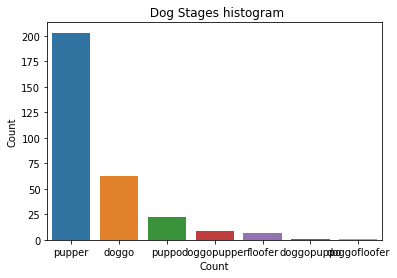

In [56]:
%matplotlib inline

sorted_stage = df_clean['stage'].value_counts().head(7).index
sns.countplot(data = df_clean, x = 'stage', order = sorted_stage, orient = 'h');
plt.ylabel('Count');
plt.xlabel('Count');
plt.title(' Dog Stages histogram');


In [57]:

df_clean.to_csv('twitter_archive_master.csv',index=False)
